In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
import numpy as np
import pandas as pd

from zipfile import ZipFile
from PIL import Image
from tqdm.autonotebook import tqdm
from IPython.display import display
from IPython.display import Image as Dimage

In [1]:
import zipfile
import os

#os.mkdir("/content/dataset")

files_to_extract = ["bg_192.zip", "fg_711.zip", "fg_bg_7z.zip", "fg_bg_depth_full.zip", "mask.zip"]
for fp in files_to_extract:
  path_to_zip_file = f"/content/gdrive/My Drive/EVA4_S15_Data/{fp}"
  directory_to_extract_to = '/content/gdrive/My Drive/'
  print("Extracting zip file: %s" % path_to_zip_file)
  # with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
  #   zip_ref.extractall(directory_to_extract_to)
  print("Extracted at: %s" % directory_to_extract_to)

Extracting zip file: /content/gdrive/My Drive/EVA4_S15_Data/bg_192.zip
Extracted at: /content/gdrive/My Drive/
Extracting zip file: /content/gdrive/My Drive/EVA4_S15_Data/fg_711.zip
Extracted at: /content/gdrive/My Drive/
Extracting zip file: /content/gdrive/My Drive/EVA4_S15_Data/fg_bg_7z.zip
Extracted at: /content/gdrive/My Drive/
Extracting zip file: /content/gdrive/My Drive/EVA4_S15_Data/fg_bg_depth_full.zip
Extracted at: /content/gdrive/My Drive/
Extracting zip file: /content/gdrive/My Drive/EVA4_S15_Data/mask.zip
Extracted at: /content/gdrive/My Drive/


In [ ]:
import zipfile

path_to_zip_file = "/content/fg_bg.zip"
directory_to_extract_to = '/content/'
print("Extracting zip file: %s" % path_to_zip_file)
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
  zip_ref.extractall(directory_to_extract_to)
print("Extracted at: %s" % directory_to_extract_to)

Extracting zip file: /content/fg_bg.zip
Extracted at: /content/


In [ ]:
import zipfile

path_to_zip_file = "/content/fg_bg.zip"
directory_to_extract_to = '/content/'
print("Extracting zip file: %s" % path_to_zip_file)
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
  zip_ref.extractall(directory_to_extract_to)
print("Extracted at: %s" % directory_to_extract_to)

Extracting zip file: /content/fg_bg.zip
Extracted at: /content/


In [ ]:
import os
os.chdir('/content/dataset/')

In [ ]:
import os
print("The number of Background images are: ", sum([len(files) for r,d, files in os.walk('/content/dataset/bg_192/')]))
print("The number of Foreground images are: ", sum([len(files) for r,d, files in os.walk('/content/dataset/fg_711')]))
print("The number of Foreground overlayed on Background (fg_bg) images are: ", sum([len(files) for r,d, files in os.walk('/content/dataset/fg_bg')]))
print("The number of Depth images for fg_bg are: ", sum([len(files) for r,d, files in os.walk('/content/dataset/fg_bg_depth_full')]))
print("The number of masks images for fg_bg are: ", sum([len(files) for r,d, files in os.walk('/content/dataset/mask')]))

The number of Background images are:  100
The number of Foreground images are:  100
The number of Foreground overlayed on Background (fg_bg) images are:  400000
The number of Depth images for fg_bg are:  400000
The number of masks images for fg_bg are:  400000


## Background Images

In [ ]:
import glob
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
count = 0
sum_mean = [0, 0, 0]; sum_std = [0, 0, 0]
for i in glob.glob('/content/dataset/bg_192/*.jpg'):
  img = cv2.imread(i)
  b = img[:,:,0]/255
  g = img[:,:,1]/255
  r = img[:,:,2]/255
  sum_mean[0] += np.mean(b)
  sum_std[0] += np.std(b)
  sum_mean[1] += np.mean(g)
  sum_std[1] += np.std(g)
  sum_mean[2] += np.mean(r)
  sum_std[2] += np.std(r)
  count=count+1
  if(count%10000==0):
    break
sum_mean[0] = sum_mean[0]/(count)
sum_std[0] = sum_std[0]/count
sum_mean[1] = sum_mean[1]/count
sum_std[1] = sum_std[1]/count
sum_mean[2] = sum_mean[2]/count
sum_std[2] = sum_std[2]/count
print("Mean: -",sum_mean)
print("stdDev: -", sum_std)

Mean: - [0.5403122180947033, 0.5633338524645969, 0.5810621234170751]
stdDev: - [0.20355385481608387, 0.19127099473728648, 0.18541210402800384]


## Foreground Images

In [ ]:
import glob
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
count = 0
sum_mean = [0, 0, 0]; sum_std = [0, 0, 0]
for i in glob.glob('/content/dataset/fg_711/*.png'):
  img = cv2.imread(i)
  b = img[:,:,0]/255
  g = img[:,:,1]/255
  r = img[:,:,2]/255
  sum_mean[0] += np.mean(b)
  sum_std[0] += np.std(b)
  sum_mean[1] += np.mean(g)
  sum_std[1] += np.std(g)
  sum_mean[2] += np.mean(r)
  sum_std[2] += np.std(r)
  count=count+1
  if(count%10000==0):
    break
sum_mean[0] = sum_mean[0]/(count)
sum_std[0] = sum_std[0]/count
sum_mean[1] = sum_mean[1]/count
sum_std[1] = sum_std[1]/count
sum_mean[2] = sum_mean[2]/count
sum_std[2] = sum_std[2]/count
print("Mean: -",sum_mean)
print("stdDev: -", sum_std)

Mean: - [0.34180540902677564, 0.3468278553552269, 0.36595163426789834]
stdDev: - [0.24235679634167165, 0.24629182510957837, 0.2542139242590849]


## Foreground on Background (fg_bg) Images

In [ ]:
import glob
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
count = 0
sum_mean = [0, 0, 0]; sum_std = [0, 0, 0]
for i in glob.glob('/content/dataset/fg_bg/*.jpg'):
  img = cv2.imread(i)
  b = img[:,:,0]/255
  g = img[:,:,1]/255
  r = img[:,:,2]/255
  sum_mean[0] += np.mean(b)
  sum_std[0] += np.std(b)
  sum_mean[1] += np.mean(g)
  sum_std[1] += np.std(g)
  sum_mean[2] += np.mean(r)
  sum_std[2] += np.std(r)
  count=count+1
  if(count%10000==0):
    break
sum_mean[0] = sum_mean[0]/(count)
sum_std[0] = sum_std[0]/count
sum_mean[1] = sum_mean[1]/count
sum_std[1] = sum_std[1]/count
sum_mean[2] = sum_mean[2]/count
sum_std[2] = sum_std[2]/count
print("Mean: -",sum_mean)
print("stdDev: -", sum_std)

Mean: - [0.5249434526484199, 0.5461530589171423, 0.5666146597456257]
stdDev: - [0.2223662527529692, 0.21350383565825454, 0.20776673925256428]


## Depth Images

In [ ]:
import glob
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
count = 0
sum_mean = [0, 0, 0]; sum_std = [0, 0, 0]
for i in glob.glob('/content/dataset/fg_bg_depth_full/*.jpg'):
  img = cv2.imread(i)
  b = img[:,:,0]/255
  g = img[:,:,1]/255
  r = img[:,:,2]/255
  sum_mean[0] += np.mean(b)
  sum_std[0] += np.std(b)
  sum_mean[1] += np.mean(g)
  sum_std[1] += np.std(g)
  sum_mean[2] += np.mean(r)
  sum_std[2] += np.std(r)
  count=count+1
  if(count%10000==0):
    break
sum_mean[0] = sum_mean[0]/(count)
sum_std[0] = sum_std[0]/count
sum_mean[1] = sum_mean[1]/count
sum_std[1] = sum_std[1]/count
sum_mean[2] = sum_mean[2]/count
sum_std[2] = sum_std[2]/count
print("Mean: -",sum_mean)
print("stdDev: -", sum_std)

Mean: - [0.4294649119647875, 0.4294649119647875, 0.4294649119647875]
stdDev: - [0.25429666346301927, 0.25429666346301927, 0.25429666346301927]


## Mask Images

In [ ]:
import glob
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
count = 0
sum_mean = [0, 0, 0]; sum_std = [0, 0, 0]
for i in glob.glob('/content/dataset/mask/*.jpg'):
  img = cv2.imread(i)
  b = img[:,:,0]/255
  g = img[:,:,1]/255
  r = img[:,:,2]/255
  sum_mean[0] += np.mean(b)
  sum_std[0] += np.std(b)
  sum_mean[1] += np.mean(g)
  sum_std[1] += np.std(g)
  sum_mean[2] += np.mean(r)
  sum_std[2] += np.std(r)
  count=count+1
  if(count%10000==0):
    break
sum_mean[0] = sum_mean[0]/(count)
sum_std[0] = sum_std[0]/count
sum_mean[1] = sum_mean[1]/count
sum_std[1] = sum_std[1]/count
sum_mean[2] = sum_mean[2]/count
sum_std[2] = sum_std[2]/count
print("Mean: -",sum_mean)
print("stdDev: -", sum_std)

Mean: - [0.09704537488085521, 0.09704537488085521, 0.09704537488085521]
stdDev: - [0.2828981529004302, 0.2828981529004302, 0.2828981529004302]


## Data Visualization

In [ ]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from google.colab.patches import cv2_imshow

## Background Images

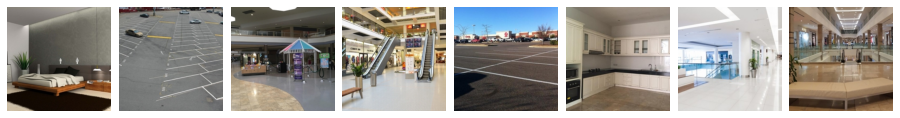

In [ ]:
plt.figure(figsize=(40,40))
gs = gridspec.GridSpec(20,20)
gs.update(wspace=0.025, hspace=0.05)
count1 = 181;
for i in range(11,19):
  plt.subplot(gs[count1])
  img  = cv2.imread('/content/dataset/bg_192/bg192_'+str(i)+'.jpg')[:,:,::-1]
  pixels = np.array(img)
  plt.imshow(pixels)
  plt.axis('off')
  count1 = count1 + 1

plt.show()

## Foreground Images

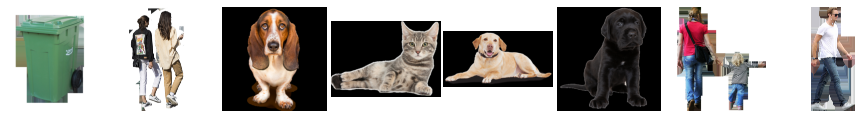

In [ ]:
plt.figure(figsize=(40,40))
gs = gridspec.GridSpec(20,20)
gs.update(wspace=0.025, hspace=0.05)
count1 = 181;
for i in ['01', '06', '08', '16', '19', '26', '31', '39']:
  plt.subplot(gs[count1])
  img  = cv2.imread('/content/dataset/fg_711/fg_0'+str(i)+'.png')[:,:,::-1]
  pixels = np.array(img)
  plt.imshow(pixels)
  plt.axis('off')
  count1 = count1 + 1

plt.show()

## Foreground on Background (fg_bg) Images

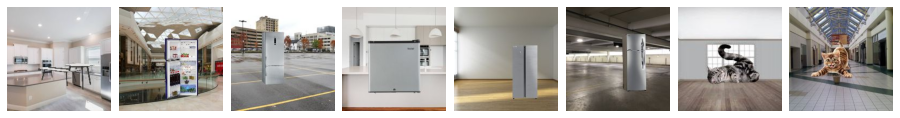

In [ ]:
plt.figure(figsize=(40,40))
gs = gridspec.GridSpec(20,20)
gs.update(wspace=0.025, hspace=0.05)
count1 = 181;
for i in range(21,29):
  plt.subplot(gs[count1])
  img  = cv2.imread('/content/dataset/fg_bg/bg192_'+str(i)+'_fg'+str(i)+str(i)+'.jpg')[:,:,::-1]
  pixels = np.array(img)
  plt.imshow(pixels)
  plt.axis('off')
  count1 = count1 + 1

plt.show()

## Depth Images

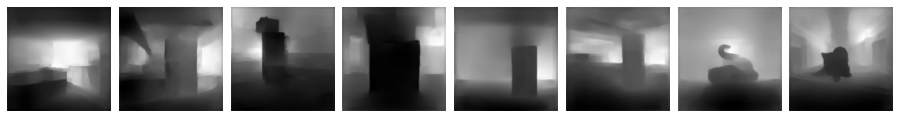

In [ ]:
plt.figure(figsize=(40,40))
gs = gridspec.GridSpec(20,20)
gs.update(wspace=0.025, hspace=0.05)
count1 = 181;
for i in range(21,29):
  plt.subplot(gs[count1])
  img  = cv2.imread('/content/dataset/fg_bg_depth_full/bg_'+str(i)+'bg192_'+str(i)+'_fg'+str(i)+str(i)+'.jpg')[:,:,::-1]
  pixels = np.array(img)
  plt.imshow(pixels)
  plt.axis('off')
  count1 = count1 + 1

plt.show()

## Mask Images

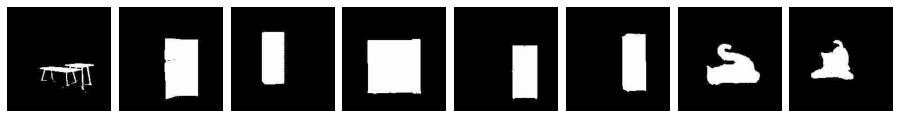

In [ ]:
plt.figure(figsize=(40,40))
gs = gridspec.GridSpec(20,20)
gs.update(wspace=0.025, hspace=0.05)
count1 = 181;
for i in range(21,29):
  plt.subplot(gs[count1])
  img  = cv2.imread('/content/dataset/mask/bg192_'+str(i)+'_fg'+str(i)+str(i)+'.jpg')[:,:,::-1]
  pixels = np.array(img)
  plt.imshow(pixels)
  plt.axis('off')
  count1 = count1 + 1

plt.show()